In [1]:
# Importing libraries
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model, svm, preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Reading the datasets
data1 = pd.read_csv('wheat-2013-supervised.csv')
data2 = pd.read_csv('wheat-2014-supervised.csv')
# Merging two datasets
merged = data1.append(data2, ignore_index=True)
merged = merged[["CountyName","State","Latitude","Longitude","Date","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
merged.to_csv('merged.csv', index=None, header=True)

mg = pd.read_csv('merged.csv')
mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
mg.dropna(inplace=True)
mg = abs(mg)

X = np.array(mg.drop(["Yield"],1))
y = np.asarray(mg['Yield'],dtype= np.int64)


In [7]:
from sklearn.model_selection import cross_validate
lasso = linear_model.Lasso()
cv_results = cross_validate(lasso, X, y, cv=5)

cv_results['test_score']

array([0.15850998, 0.19712724, 0.19283344, 0.20953988, 0.21961722])

In [8]:
DT = DecisionTreeRegressor()
cv_results = cross_val_score(DT, X, y, cv=5)
print(cv_results.mean())

0.34292397737766234


In [8]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_r2',
 'train_neg_mean_squared_error',
 'train_r2']

In [9]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
cv_results = cross_val_score(regressor, X, y, cv=5)
print(cv_results.mean())

0.38908399533905935


In [23]:
# IMPLEMENTING lSTM
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [37]:
# Reading the datasets
data1 = pd.read_csv('wheat-2013-supervised.csv')
data2 = pd.read_csv('wheat-2014-supervised.csv')
# Merging two datasets
merged = data1.append(data2, ignore_index=True)
merged = merged[["CountyName","State","Latitude","Longitude","Date","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
merged.to_csv('merged.csv', index=None, header=True)

mg = pd.read_csv('merged.csv')
mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
mg.dropna(inplace=True)
dataset = abs(mg)

In [44]:
dataset = dataset[1:10000]

In [45]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset = dataset.astype('float32')


In [171]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# trainX,testX, trainY, testY = train_test_split(train,test)
# reshape input 
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [185]:
len(dataset) - train_size

3300

In [160]:
testX.shape,trainX.shape,testY.shape,trainY.shape

((3296, 3), (6695, 3), (3296,), (6695,))

In [248]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(None, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [249]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 1)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [250]:
history = model.fit(trainX, trainY, epochs=100,validation_data =(testX, testY) )


Epoch 1/100
210/210 [==============================] - 1s 6ms/step - loss: 0.1759 - accuracy: 0.0010 - val_loss: 0.0901 - val_accuracy: 9.1019e-04
Epoch 2/100
210/210 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.0015 - val_loss: 0.0427 - val_accuracy: 0.0015
Epoch 3/100
210/210 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.0013 - val_loss: 0.0402 - val_accuracy: 9.1019e-04
Epoch 4/100
210/210 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.0010 - val_loss: 0.0381 - val_accuracy: 9.1019e-04
Epoch 5/100
210/210 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.0010 - val_loss: 0.0360 - val_accuracy: 9.1019e-04
Epoch 6/100
210/210 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.0010 - val_loss: 0.0338 - val_accuracy: 9.1019e-04
Epoch 7/100
210/210 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.0010 - val_loss: 0.0317 - 

In [266]:
trainpredict = model.predict(trainX)
results = model.predict(testX)
results.shape

(3296, 1)

In [267]:
# reshape output 
trainY = numpy.reshape(trainY, (trainY.shape[0], 1))
testY = numpy.reshape(testY, (testY.shape[0], 1))

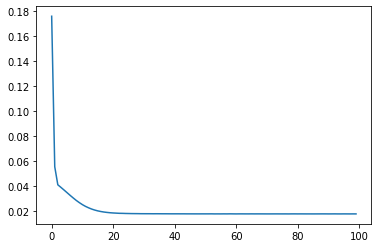

In [256]:
# Plotting the loss to see where it converges and goes constant
plt.plot(history.history['loss'])
plt.show()

In [265]:
accuracy = (numpy.mean(testY)+numpy.mean(results))/2
accuracy

0.4623326361179352

In [254]:
# plt.xlim(0,1)
# plt.ylim(0,0.7)
# plt.scatter(range(20),results, color=['red'])
# plt.scatter(range(20),testY, c='g')

# plt.scatter(testY, results, color=['red'])
# plt.show()
# df =pd.DataFrame([testY, results],columns=['a','b'],index=['k','p']).round()
# numpy_data = numpy.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=results, columns=["Predicted Values"])
df["Actual Values"] = testY
# testY.shape,results.shape
df


,Predicted Values,Actual Values
0,0.418921,0.418582
1,0.424129,0.432072
2,0.436413,0.356780
3,0.370048,0.350196
4,0.363543,0.358583
...,...,...
3291,0.519104,0.530570
3292,0.519200,0.528790
3293,0.517622,0.528073
3294,0.516906,0.993604


In [269]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, results))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.13 RMSE
Test Score: 0.13 RMSE
